## This notebook defines a lightcone geometry and creates a catalog of dark matter halos, based on Kitzbichler and White 2007 and Snyder et al. 2017, using the halo catalogs of the Indra simulations that have been loaded onto the SciServer. 

In [1]:
import sys
sys.path.append('/home/idies/workspace/wfirst/src/lightcones')

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import astropy
import astropy.io.ascii as ascii
import indratools as indra
import geometry
import indra_lightcone_catalog as lc

# 1. Define geometry
## Determine the path of the lightcone based on the simulation parameters, cosmology, and snapshot information

In [3]:
# Get simulation parameters from header
datadir = '/home/idies/workspace/indra/2_0_0/'
header = indra.getheader(2,0,0,63,datadir)
h = header['hubble']
L = header['BoxSize']

In [4]:
# Get snapshot info
data = ascii.read('/home/idies/workspace/Storage/gsnyder/WFIRST Archive-SIT Data Simulation/wfirst-lightcones/snapinfo.txt')
zlist = data['redshift']
namelist = data['snapnum'].astype(str)

In [5]:
# Load cosmology (both Indra and Illustris are WMAP7)
cosmology = geometry.Cosmology(H0=h*100,WM=header['omega0'],WV=header['omegaL'])
mpcgrid = cosmology.comoving_mpc_grid
zgrid = cosmology.redshift_grid

### Choose integers m and n that define the pointing of the lightcone from the origin. Based on the simulation size (in this case 1 Gpc/h) this will determine the area of the field and how far back in redshift you can go before the volume repeats. We will define two fields: 1.9 square degrees and 0.4 square degrees.

In [6]:
def survey_size(m,n,box=1000):
    side1 = 1./(m*n*n)*(180/np.pi)
    side2 = 1./(m*m*n)*(180/np.pi)
    zmax = np.interp(np.sqrt(n*n+m*m+n*n*m*m)*box,mpcgrid,zgrid)
    print("m = {}, n = {}, L = {} Mpc/h: {:.1f} x {:.1f} = {:.2f} deg^2 out to z = {:.1f}"\
          .format(m,n,box,side1,side2,side1*side2,zmax))

In [7]:
survey_size(3,4)
survey_size(4,5)

m = 3, n = 4, L = 1000.0 Mpc/h: 1.2 x 1.6 = 1.90 deg^2 out to z = 97.8
m = 4, n = 5, L = 1000.0 Mpc/h: 0.6 x 0.7 = 0.41 deg^2 out to z = 100.0


### Output a list of the simulation snapshots to be used and where the lightcone enters and exits each volume.

In [8]:
# Create a light cone object and output to a geometry file
indra_4_3 = geometry.LightCone(L/h,cosmology,"Indra 1.90 deg^2")
indra_4_3.BasicCone(4.0, 3.0, namelist, zlist, manual_dist_limit=11000.0)  #dist_limit: z~18
indra_4_3.export_runparams('geometry_indra_4_3_xyz.txt')
indra_5_4 = geometry.LightCone(L/h,cosmology,"Indra 0.41 deg^2")
indra_5_4.BasicCone(5.0, 4.0, namelist, zlist, manual_dist_limit=11000.0)  #dist_limit: z~18
indra_5_4.export_runparams('geometry_indra_5_4_xyz.txt')



Information about:  Indra 1.90 deg^2
	 Comoving Single Box L =  1420.4545454545455
	 Basic info: n,m =  4.0 3.0
	 Approx. Comoving distance at first repeat:  18465.91
	 Approx. Redshift at first repeat:  100.0
	 Number of replications:  12
 
	 X range [Mpc] =  [5445.07575758 5918.56060606]
	 Y range [Mpc] =  [4083.80681818 4438.92045455]
	 Z height [Mpc] =  [17045.45454545]

	 del A, arcmin: 95.49
	 del B, arcmin: 71.62

	 Direction Unit Vector:  [0.30769231 0.23076923 0.92307692]
	 Alpha Unit Vector:  [ 0.          0.9701425  -0.24253563]
	 Delta Unit Vector:  [-0.95148591  0.07462635  0.29850538]
	 Test, should be Direction vector:  [0.30769231 0.23076923 0.92307692]
 
	 Computing camera parameters for lightcone:  Indra 1.90 deg^2
cmpc:   [4.25754666]
## Indra 1.90 deg^2,   LightCone Created, 2018-11-30

## Comoving Single Box L = 1420.4545454545455

## HubbleParam = 0.704

## Basic info: n,m = 4.0 , 3.0

## Approx. Comoving distance at first repeat: 18465.909091

## Approx. Redshi

# 2. Populate lightcone with halos
## Find the halos that fall within the defined lightcone geometry, calculate their properties (observed redshift, angular diameter distance, etc.), and save them to a catalog file

In [9]:
indra_id = '2_0_0' # one of the 448 Indra halo catalog datasets currently on SciServer!
basedir = '/home/idies/workspace/indra/'+indra_id
minz = 0.; maxz = 10.

In [10]:
# Populate the lightcone with halos and create an ASCII catalog
geometryfile = 'geometry_indra_4_3_xyz.txt'
catalogfile34 = '%s_RADEC_4_3_xyz.txt' % indra_id
catalog_xyz = lc.process_lightcone_catalog(lightcone=geometryfile,basedir=basedir)
catalog_xyz = catalog_xyz.process_lightcone(minz=minz,maxz=maxz)
catalog_xyz.output_catalog(catalogfile34)
geometryfile = 'geometry_indra_5_4_xyz.txt'
catalogfile45 = '%s_RADEC_5_4_xyz.txt' % indra_id
catalog_xyz = lc.process_lightcone_catalog(lightcone=geometryfile,basedir=basedir)
catalog_xyz = catalog_xyz.process_lightcone(minz=minz,maxz=maxz)
catalog_xyz.output_catalog(catalogfile45)

Initializing Lightcone File:  geometry_indra_4_3_xyz.txt
col1 col2   col3      col4    ...     col18       col19     col20     col21   
---- ---- ------- ----------- ... ------------- ---------- ------- -----------
   0   56  0.1749         0.0 ...           0.0        0.0  0.1882  16118.5973
   1   46  0.6236 333333.3333 ...  -872000.3064 19680.2066   0.629  32237.1946
   2   39  1.1734 666666.6667 ... -1282567.1312 28946.3041   1.215  48355.7919
   3   32    2.07        -0.0 ... -1386027.1325 31281.2967  2.0745  64474.3891
   4   25  3.5759 333333.3333 ...  -1274611.281 28766.7483  3.4577  80592.9864
   5   18  6.1968 666666.6667 ...  -1017233.053 22957.9697   5.982  96711.5837
   6   11 10.9438        -0.0 ...   -687483.209 15515.8335  11.397  112830.181
   7    3    30.0 333333.3333 ...  -358261.9457  8085.6269 26.7539 128948.7783
    Direction vector:  0.30769232 0.23076923 0.9230769
    Up vector:  -0.95148593 0.07462635 0.29850537
    B FOV, arcmin:  71.61972
    A FOV, arcmin: 

<Figure size 1575x1575 with 0 Axes>

In [11]:
def readcatalog(filename):
    cat_data = ascii.read(filename)
    catalog = {}
    catalog['snapnum'] = cat_data['col1'].data
    catalog['sub index'] = cat_data['col2'].data
    catalog['RA deg'] = cat_data['col3'].data
    catalog['Dec deg'] = cat_data['col4'].data
    catalog['RA kpc true z'] = cat_data['col5'].data
    catalog['Dec kpc true z'] = cat_data['col6'].data
    catalog['RA kpc inferred'] = cat_data['col7'].data
    catalog['Dec kpc inferred'] = cat_data['col8'].data
    catalog['z cosmo'] = cat_data['col9'].data
    catalog['z observed'] = cat_data['col10'].data
    catalog['z peculiar'] = cat_data['col11'].data
    catalog['scale kpc/arcsec'] = cat_data['col12'].data
    catalog['galaxy x'] = cat_data['col13'].data
    catalog['galaxy y'] = cat_data['col14'].data
    catalog['galaxy z'] = cat_data['col15'].data
    catalog['ang dist true'] = cat_data['col16'].data
    catalog['ang dist inferred'] = cat_data['col17'].data
    catalog['snap z'] = cat_data['col18'].data
    catalog['center z'] = cat_data['col19'].data
    catalog['cylinder num'] = cat_data['col20'].data
    catalog['halo mass'] = cat_data['col21'].data
    catalog['camera x'] = cat_data['col22'].data
    catalog['camera y'] = cat_data['col23'].data
    catalog['camera z'] = cat_data['col24'].data
    catalog['camera vx'] = cat_data['col25'].data
    catalog['camera vy'] = cat_data['col26'].data
    catalog['camera vz'] = cat_data['col27'].data
    catalog['hubble vel'] = cat_data['col28'].data
    
    return catalog

# 3. Do some science!

In [12]:
catalogfile = '%s_RADEC_4_3_xyz.txt' % indra_id
cat34 = readcatalog(catalogfile)
catalogfile = '%s_RADEC_5_4_xyz.txt' % indra_id
cat45 = readcatalog(catalogfile)

### The code creates a lightcone with a square field-of-view. Let's plot the RA and Dec of all objects in both lightcones, colored by their redshift. For comparison, we show the 0.28 square degree WFI FOV in black, and a single sensor chip assembly in blue.

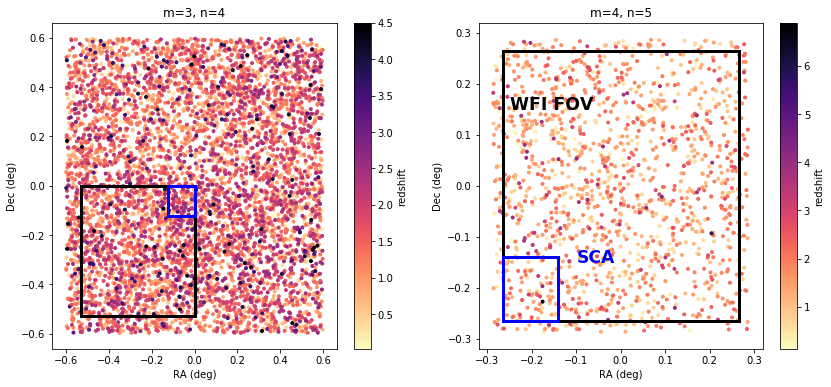

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
norm34 = mpl.colors.Normalize(vmin=np.min(cat34['z observed']),vmax=np.max(cat34['z observed']))
im34 = ax1.scatter(cat34['RA deg'],cat34['Dec deg'],c=cat34['z observed'],marker='.',cmap='magma_r')
cbar1 = fig.colorbar(im34,ax=ax1)
cbar1.set_label('redshift')
ax1.add_patch(mpl.patches.Rectangle((-.53,-.53),.53,.53,fill=False,lw=3)) # The .28 deg^2 WFI FOV
ax1.add_patch(mpl.patches.Rectangle((-.125,-.125),.125,.125,fill=False,lw=3,color='b')) # A single WFI chip
ax1.set_xlabel('RA (deg)')
ax1.set_ylabel('Dec (deg)')
ax1.set_title('m=3, n=4')
norm45 = mpl.colors.Normalize(vmin=np.min(cat45['z observed']),vmax=np.max(cat45['z observed']))
im45 = ax2.scatter(cat45['RA deg'],cat45['Dec deg'],c=cat45['z observed'],marker='.',cmap='magma_r')
cbar2 = fig.colorbar(im45,ax=ax2)
cbar2.set_label('redshift')
ax2.add_patch(mpl.patches.Rectangle((-.53/2,-.53/2),.53,.53,fill=False,lw=3))
ax2.add_patch(mpl.patches.Rectangle((-.53/2,-.53/2),.125,.125,fill=False,lw=3,color='b'))
ax2.text(-.25,.15,'WFI FOV',size='xx-large',weight='bold')
ax2.text(-.1,-.15,'SCA',size='xx-large',weight='bold',color='b')
ax2.set_xlabel('RA (deg)')
ax2.set_ylabel('Dec (deg)')
ax2.set_title('m=4, n=5')
plt.savefig('{}_RADEC_fov_43_54.png'.format(indra_id),bbox_inches='tight')

### Now let's look at the lightcones from the side. 

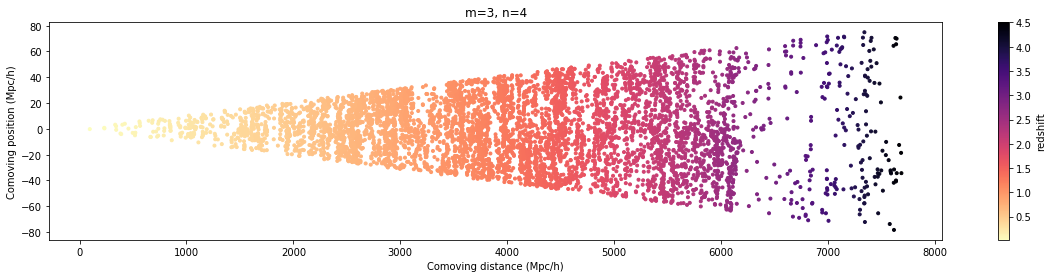

In [14]:
plt.figure(figsize=(20,4))
plt.scatter(cat34['galaxy z'],cat34['galaxy y'],c=cat34['z cosmo'],marker='.',cmap='magma_r')
plt.xlabel('Comoving distance (Mpc/h)')
plt.ylabel('Comoving position (Mpc/h)')
plt.title('m=3, n=4')
cbar = plt.colorbar()
cbar.set_label('redshift')
plt.savefig('{}_RADEC_cone_43.png'.format(indra_id),bbox_inches='tight')

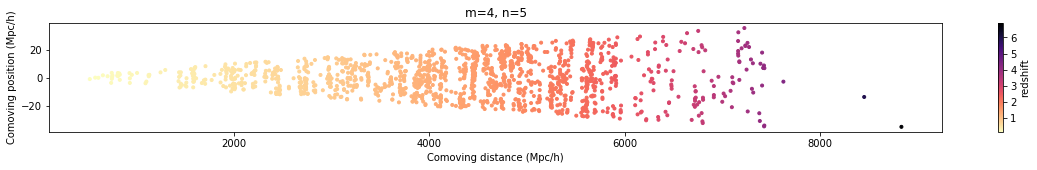

In [15]:
plt.figure(figsize=(20,2))
plt.scatter(cat45['galaxy z'],cat45['galaxy y'],c=cat45['z cosmo'],marker='.',cmap='magma_r')
plt.xlabel('Comoving distance (Mpc/h)')
plt.ylabel('Comoving position (Mpc/h)')
plt.title('m=4, n=5')
cbar = plt.colorbar()
cbar.set_label('redshift')
plt.savefig('{}_RADEC_cone_54.png'.format(indra_id),bbox_inches='tight')

### We can look at, for example, the effect of the peculiar velocities on the observed redshift. 

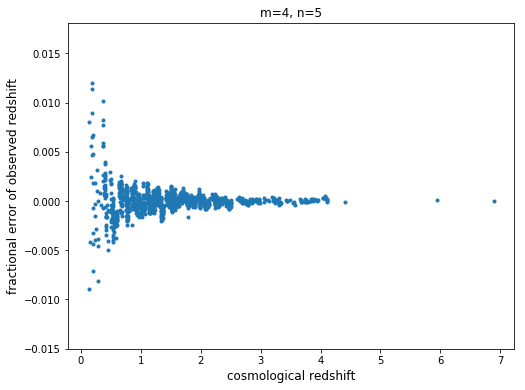

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(cat45['z cosmo'],(cat45['z observed']-cat45['z cosmo'])/cat45['z cosmo'],marker='.')
plt.xlabel('cosmological redshift',size='large')
#plt.ylabel(r'$(z_{obs}-z_{cosmo})/z_{cosmo}$',size='large')
plt.ylabel('fractional error of observed redshift',size='large')
plt.title('m=4, n=5');

### In the future, we will improve the lightcone creation and deposit Illustris galaxies into these Indra dark matter halos to get stellar mass, gas mass, magnitudes, etc. to create real (fake) images!